## 6.1 Description

A block cipher is an algorithm that encrypts blocks of a fixed length. The encryption function $E$ transforms plaintext blocks $P$ into ciphertext blocks $C$ by using a secret key $k$, the decryption function $D$ transforms ciphertext blocks $C$ back into plaintext blocks $P$ using the key $k$. The encryption and decryption functions are defined as follows:

$$\begin{split} 
C=E(k,P), \\
P=D(k,C).
\end{split}$$

A block cipher is a **keyed permutation**. It is a permutation because the block cipher maps each possible block to another block. The block cipher's block size is a fixed size. Key space is the set of all possible keys. if the block is $n$-bit, the block space is $2^n$. The key space is $2^n!$.

Once we select a secret key, the block cipher uses it to determine the encryption of any given block. We illustrate that relationship with an arrow. The tail of the arrow has the block encrypted with $E$ under key $k$ and the arrowhead is mapped to the block.

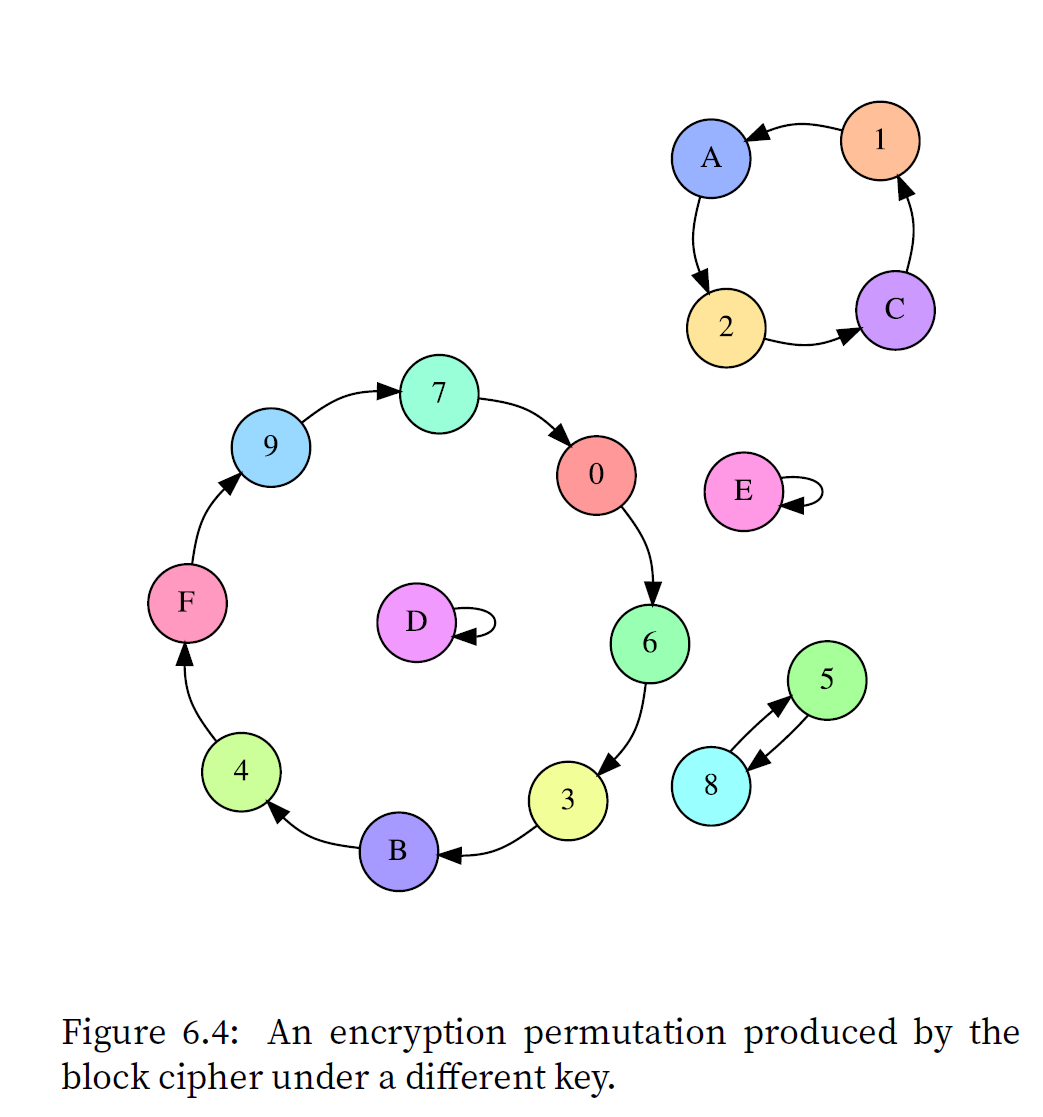


Knowing a bunch of (input, output) pairs for a given key shouldn't give you any information about any other (input, output) pairs under that key. As long as we're talking about a hypothetical perfect block cipher, there's no easier way to decrypt a block other than to “brute-force” the key.

## 6.2 AES

There are no **practical attacks** known against AES. While there have been some developments in the last few years, most of them involve **related-key attacks**, some of them only on reduced-round versions of AES.

> While a theoretically ideal block cipher wouldn't be vulnerable to a related key attack, these attacks aren't considered practical concerns. In practice cryptographic keys are generated via a cryptographically secure pseudorandom number generator, or a similarly secure key agreement scheme or key derivation scheme (we'll see more about those later). Therefore, the odds of selecting two such related keys by **accident** is **nonexistent**.

### SubBytes

It works by taking the multiplicative inverse over the Galois field, and then applying an affine transformation so that there are no values $x$ so that $x\oplus S(x) = 0$ or $x\oplus S(x) = \text{0xff}$. To rephrase: there are no values of $x$ that the substitution box maps to $x$ itself, or $x$ with all bits flipped. This makes the cipher resistant to **linear cryptanalysis**, unlike the earlier DES algorithm, whose fifth S-box caused serious security problems.

## 6.3 DES and 3DES

The DES is one of the oldest block ciphers that saw widespread use. It was published as an official FIPS standard in 1977. It is no longer considered secure, mainly due to its tiny key size of 56 bits.

In an effort to extend the life of the DES algorithm, in a
way that allowed much of the spent **hardware development**
effort to be reused, people came up with 3DES: a scheme
where input is first encrypted, then decrypted, then encrypted
again:
$$C = E_{DES}(k_1,D_{DES}(k_2,E_{DES}(k_3, p)))$$

On the same hardware and in the same mode of operation (we'll explain what that means in the next chapter), AES-128 only takes `12.6` cycles per byte, while 3DES takes up to `134.5` cycles per byte.

## 6.4 Remaining problems

Obviously, we'd like to be able to send much larger messages, or, ideally, streams of indeterminate size. We'll address this problem
with a stream cipher.

we still need to address the issue of agreeing on those few key
bytes, potentially over an insecure channel.